In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Optional: for better plot styling
sns.set(style='whitegrid')


In [3]:
# Cell 2: Load Dataset
df = pd.read_csv('/Users/adarshnagia/Downloads/global_superstore.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,"July 31, 2012",7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,"February 5, 2013",2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,"October 17, 2013",10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,"January 28, 2013",1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,"November 5, 2013",11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
# Cell 3: Handle Missing Values
print("Missing Values:\n", df.isnull().sum())

# Example handling
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Profit'] = df['Profit'].fillna(df['Profit'].median())

# Drop any remaining nulls
df.dropna(inplace=True)


Missing Values:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [6]:
# Cell 4: Remove Duplicates
df.drop_duplicates(inplace=True)


In [7]:
# Cell 5: Remove Outliers Using IQR Method
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Profit'] < (Q1 - 1.5 * IQR)) | (df['Profit'] > (Q3 + 1.5 * IQR)))]


In [8]:
# Cell 6: Descriptive Stats
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000
mean,36293.032171,56065.988044,91.051345,3.550475,0.148920,11.604086,10.024378
std,2889.780636,32077.418326,156.189857,2.076080,0.197695,18.641425,20.572360
min,31297.000000,1040.000000,0.444000,1.000000,0.000000,-39.637000,0.010000
25%,33795.000000,24153.000000,13.970000,2.000000,0.000000,2.049200,1.190000
50%,36279.000000,60505.000000,35.440000,3.000000,0.200000,7.257600,3.240000
75%,38793.000000,90032.000000,99.870000,5.000000,0.200000,19.034400,9.630000
max,41289.000000,99301.000000,2803.920000,14.000000,0.800000,70.722000,356.680000


In [10]:
# Cell 7: Correlation Matrix
corr_matrix = df.select_dtypes(include=['number']).corr()
corr_matrix


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.014808,0.000187,-0.001408,0.014403,-0.014604,-0.010367
Postal Code,0.014808,1.000000,0.075585,0.027722,0.046284,0.001696,0.060280
Sales,0.000187,0.075585,1.000000,0.162896,-0.037185,0.322309,0.810260
Quantity,-0.001408,0.027722,0.162896,1.000000,0.008275,0.182883,0.124970
Discount,0.014403,0.046284,-0.037185,0.008275,1.000000,-0.431420,-0.024414
Profit,-0.014604,0.001696,0.322309,0.182883,-0.431420,1.000000,0.264364
Shipping Cost,-0.010367,0.060280,0.810260,0.124970,-0.024414,0.264364,1.000000


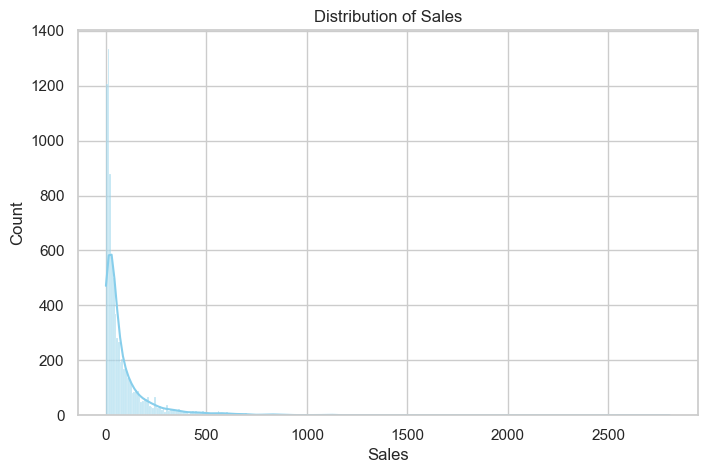

In [11]:
# Cell 8: Histogram for Sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.show()


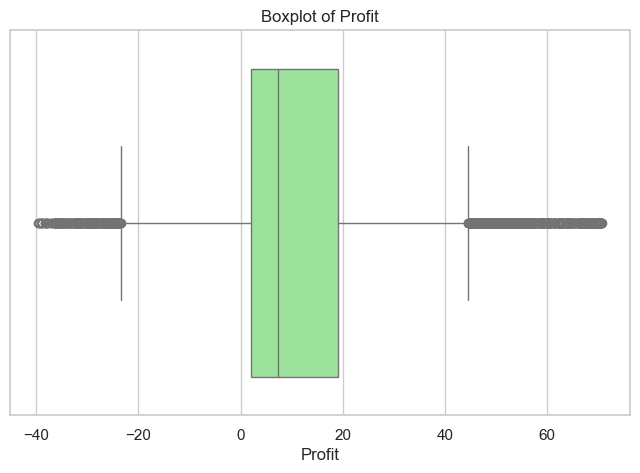

In [12]:
# Cell 9: Boxplot for Profit
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Profit'], color='lightgreen')
plt.title('Boxplot of Profit')
plt.show()


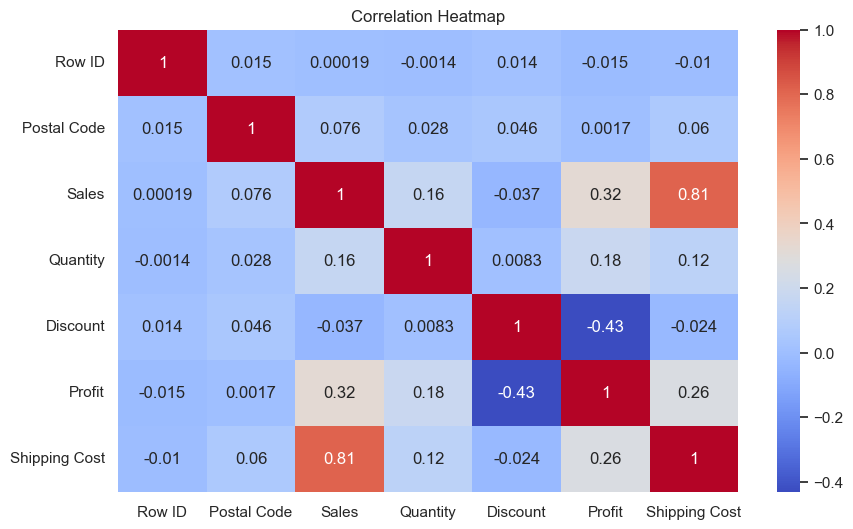

In [13]:
# Cell 10: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
